The data for this exercise is taking from [goverment wesbite](https://www.mohfw.gov.in/). Access the webpage and select "COVID-19 Statewise Status (Click to expand)" and it will show the table with all info.

To get the data --> right click inspect --> go to network --> refresh the page again --> search for datanew.json --> right click and open into a new tab --> we get the link for the data. --> we can import this data into pandas and create DataFrame

In [1]:
import pandas as pd

df = pd.read_json('https://www.mohfw.gov.in/data/datanew.json')

In [2]:
df.tail()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
32,33,Tripura,30,33464,33043,391,34,33470,33044,392,16
33,35,Uttarakhand,861,98448,95883,1704,894,98552,95954,1704,05
34,36,Uttar Pradesh,3036,607538,595743,8759,3396,608076,595920,8760,09
35,37,West Bengal,3504,580631,566821,10306,3574,580999,567117,10308,19
36,11111,,334646,11646081,11151468,159967,345377,11686796,11181253,160166,


In [3]:
# the last row is total and we dont need it 
# also the first column

df = df.iloc[:-1,1:]

In [4]:
df.head()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,Andaman and Nicobar Islands,8,5039,4969,62,8,5039,4969,62,35
1,Andhra Pradesh,2188,893734,884357,7189,2382,894044,884471,7191,28
2,Arunachal Pradesh,3,16842,16783,56,2,16842,16784,56,12
3,Assam,1663,217976,215213,1100,1670,218006,215235,1101,18
4,Bihar,523,263569,261487,1559,561,263659,261537,1561,10


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [6]:
total_states = np.arange(len(df.state_name))
total_states

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

###  Total Positive Cases Based On States In India

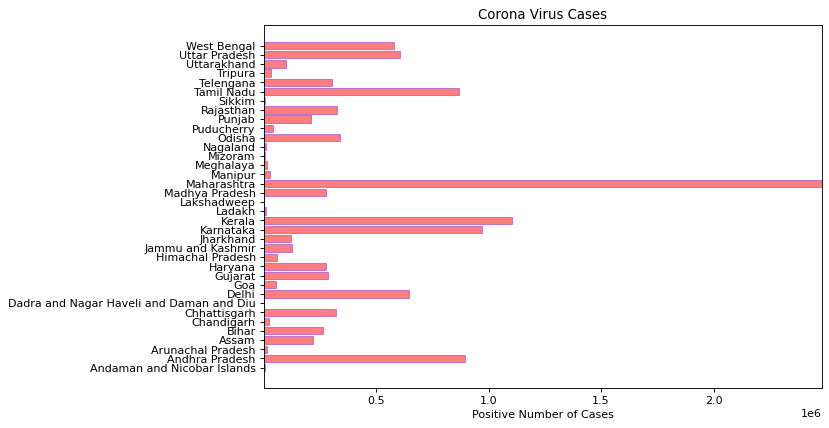

In [7]:
from matplotlib.pyplot import figure

figure(num=None,figsize=(9,6),dpi=80,facecolor='w',edgecolor='k')
plt.barh(total_states,df.positive,align='center',alpha=0.5,color=(1,0,0),edgecolor=(0.5,0.2,0.8))
plt.yticks(total_states, df['state_name'])  
plt.xlim(1,max(df['positive'])+100) 
plt.xlabel('Positive Number of Cases')  
plt.title('Corona Virus Cases')  
plt.show()

### Active Number of Cases based on States


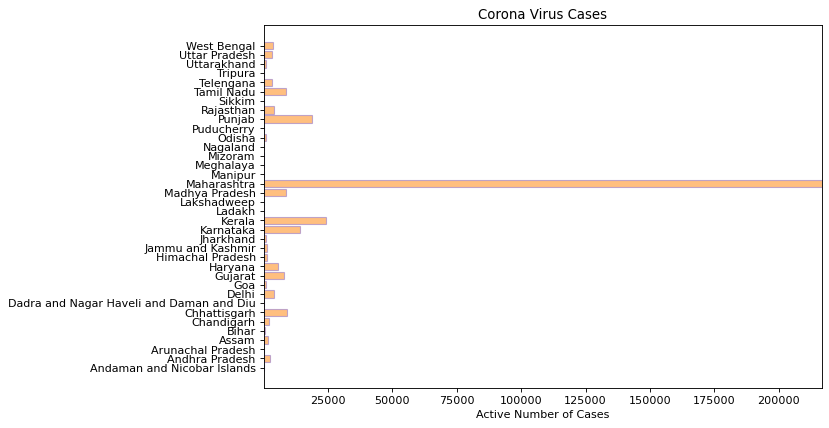

In [8]:

from matplotlib.pyplot import figure
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(total_states,df['new_active'], align='center', alpha=0.5,  
                 color=(1,0.5,0),  
                 edgecolor=(0.5,0.4,0.8)  )
    
plt.yticks(total_states, df['state_name'])  
plt.xlim(1,max(df['new_active'])+10) 
plt.xlabel('Active Number of Cases')  
plt.title('Corona Virus Cases')  
plt.show()

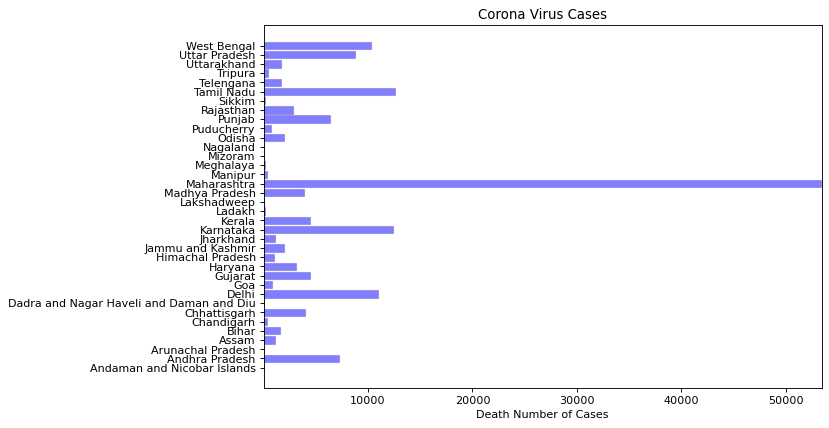

In [9]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(total_states,df['death'], align='center', alpha=0.5,  
                 color=(0,0,1),  
                 edgecolor=(0.5,0.4,0.8)  )
    
plt.yticks(total_states, df['state_name'])  
plt.xlim(1,max(df['death'])+10) 
plt.xlabel('Death Number of Cases')  
plt.title('Corona Virus Cases')  
plt.show()

### stacked chart with state as index

In [10]:
df = df.set_index('state_name',drop=True)

In [11]:
df.head()

,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
state_name,,,,,,,,,
Andaman and Nicobar Islands,8,5039,4969,62,8,5039,4969,62,35
Andhra Pradesh,2188,893734,884357,7189,2382,894044,884471,7191,28
Arunachal Pradesh,3,16842,16783,56,2,16842,16784,56,12
Assam,1663,217976,215213,1100,1670,218006,215235,1101,18
Bihar,523,263569,261487,1559,561,263659,261537,1561,10


<AxesSubplot:ylabel='state_name'>

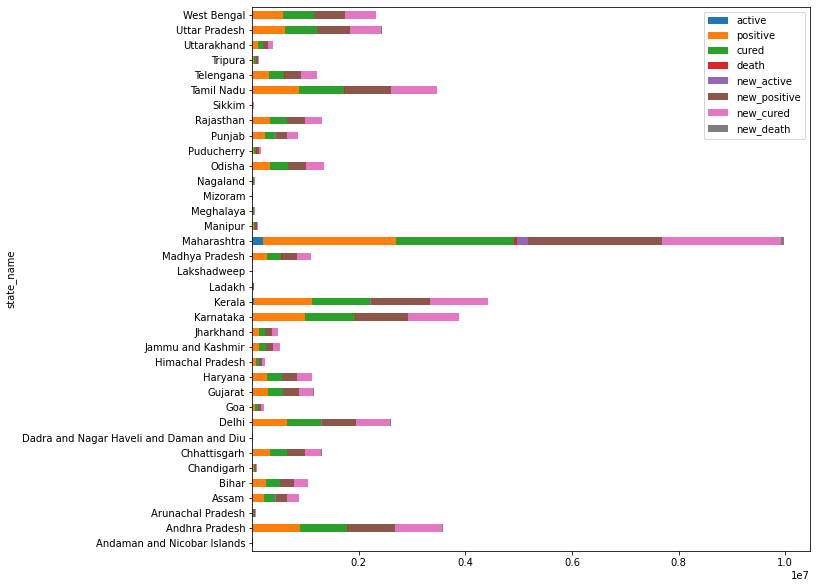

In [12]:
df.plot.barh(stacked=True,figsize=(10,10))

<AxesSubplot:ylabel='state_name'>

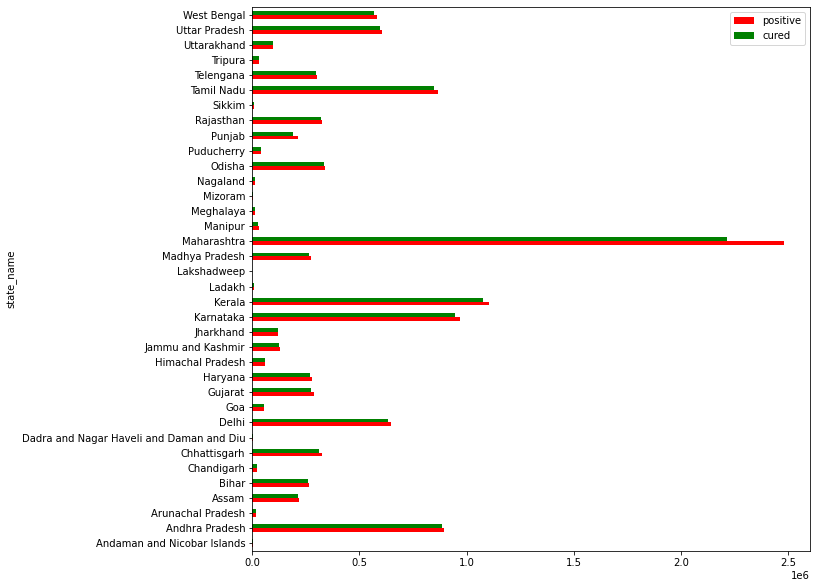

In [13]:
# lets compare only postive and cured

df[['positive','cured']].plot.barh(color={'positive':'red','cured':'green'},figsize=(10,10))